Milos Atz

Due 11/22/2016

**1. With the operator form of the Transport Equations**

$$
\boldsymbol{L}\psi=\boldsymbol{MS}\phi+\boldsymbol{M}q_e
$$

$$
\phi = \boldsymbol{D}\psi
$$

**and given the following discretizations:**
* **3 groups**
* **$\boldsymbol{P_2}$ (number of moments is $\boldsymbol{(N+1)^2)}$**
* **$\boldsymbol{S_2}$ (number of angles is $\boldsymbol{N(N + 2)}$, with the $N$ being from $S_N$ rather than $P_N$**
* **Diamond difference**

**(a) Indicate the dimensions of each matrix in Equation 1, using real numbers for what we did generically in class.**

The granularity of discretization can be used to define the size of the operators:

$$
\alpha = G \times n \times c \times u
$$

and

$$
\beta = G \times N \times c \times u
$$

Where $G$ is the number of energy groups, $N$ is the number of moments, $n$ is the number of angular unknowns, $c$ is the number of cells, and $u$ is the number of unknowns per cell, determined by spatial discretization. Equation 1 can be presented in terms of operator size as follows:

$$
(\alpha \times \alpha)(\alpha \times 1) = 
(\alpha \times \beta)(\beta \times \beta)(\beta \times 1) +
(\alpha \times \beta)(\beta \times 1)
$$

In our case, we have $G=3$, $N=(2+1)^2=9$, $n=2(2+2)=8$, $c=4x4x4=64$, and $u = 1$ (the flux).

In [1]:
G=3
N=(2+1)**2
n=(2+2)*2
c=4*4*4
u=1
a = G*n*c*u
b = G*N*c*u
print('the dimensions of L are '+str(a)+' x '+str(a))
print('the dimensions of psi are '+str(a)+' x 1')
print('the dimensions of M are '+str(a)+' x '+str(b))
print('the dimensions of S are '+str(b)+' x '+str(b))
print('the dimensions of phi are '+str(b)+' x 1')
print('the dimensions of qe are '+str(b)+' x 1')

the dimensions of L are 1536 x 1536
the dimensions of psi are 1536 x 1
the dimensions of M are 1536 x 1728
the dimensions of S are 1728 x 1728
the dimensions of phi are 1728 x 1
the dimensions of qe are 1728 x 1


**(b) Write out the matrices $\boldsymbol{\left[M\right]_{gg}}$, $\boldsymbol{S}$, and $\boldsymbol{\left[S\right]_{21}}$ as well as the vectors $\boldsymbol{\psi}$, $\boldsymbol{\left[\psi\right]_1}$, and $\boldsymbol{\left[\phi\right]_{1}}$ to make sure you know what values match with what.**

$[\boldsymbol{M}_{gg}]$ is one of the submatrices on the diagonal of $\boldsymbol{M}$. There are $G$ $[\boldsymbol{M}_{gg}]$ submatrics in $\boldsymbol{M}$. The number of rows in $[\boldsymbol{M}_{gg}]$ is equal to the number of angular unknowns; the number of columns is equal to the number of moments.

$$
[\boldsymbol{M}]_{gg}=\left[\begin{array}{cc}
% row 1
Y_{00}^{e}(\hat{\Omega}_1) & Y_{10}^{e}(\hat{\Omega}_1) & 
Y_{11}^{o}(\hat{\Omega}_1) & Y_{11}^{e}(\hat{\Omega}_1) &
Y_{20}^{e}(\hat{\Omega}_1) & Y_{21}^{o}(\hat{\Omega}_1) & 
Y_{21}^{e}(\hat{\Omega}_1) & Y_{22}^{o}(\hat{\Omega}_1) &
Y_{22}^{e}(\hat{\Omega}_1) \\
% row 2
Y_{00}^{e}(\hat{\Omega}_2) & Y_{10}^{e}(\hat{\Omega}_2) & 
Y_{11}^{o}(\hat{\Omega}_2) & Y_{11}^{e}(\hat{\Omega}_2) &
Y_{20}^{e}(\hat{\Omega}_2) & Y_{21}^{o}(\hat{\Omega}_2) & 
Y_{21}^{e}(\hat{\Omega}_2) & Y_{22}^{o}(\hat{\Omega}_2) &
Y_{22}^{e}(\hat{\Omega}_2) \\
% row 3
Y_{00}^{e}(\hat{\Omega}_3) & Y_{10}^{e}(\hat{\Omega}_3) & 
Y_{11}^{o}(\hat{\Omega}_3) & Y_{11}^{e}(\hat{\Omega}_3) &
Y_{20}^{e}(\hat{\Omega}_3) & Y_{21}^{o}(\hat{\Omega}_3) & 
Y_{21}^{e}(\hat{\Omega}_3) & Y_{22}^{o}(\hat{\Omega}_3) &
Y_{22}^{e}(\hat{\Omega}_3) \\
% row 4
Y_{00}^{e}(\hat{\Omega}_4) & Y_{10}^{e}(\hat{\Omega}_4) & 
Y_{11}^{o}(\hat{\Omega}_4) & Y_{11}^{e}(\hat{\Omega}_4) &
Y_{20}^{e}(\hat{\Omega}_4) & Y_{21}^{o}(\hat{\Omega}_4) & 
Y_{21}^{e}(\hat{\Omega}_4) & Y_{22}^{o}(\hat{\Omega}_4) &
Y_{22}^{e}(\hat{\Omega}_4) \\
% row 5
Y_{00}^{e}(\hat{\Omega}_5) & Y_{10}^{e}(\hat{\Omega}_5) & 
Y_{11}^{o}(\hat{\Omega}_5) & Y_{11}^{e}(\hat{\Omega}_5) &
Y_{20}^{e}(\hat{\Omega}_5) & Y_{21}^{o}(\hat{\Omega}_5) & 
Y_{21}^{e}(\hat{\Omega}_5) & Y_{22}^{o}(\hat{\Omega}_5) &
Y_{22}^{e}(\hat{\Omega}_5) \\
% row 6
Y_{00}^{e}(\hat{\Omega}_6) & Y_{10}^{e}(\hat{\Omega}_6) & 
Y_{11}^{o}(\hat{\Omega}_6) & Y_{11}^{e}(\hat{\Omega}_6) &
Y_{20}^{e}(\hat{\Omega}_6) & Y_{21}^{o}(\hat{\Omega}_6) & 
Y_{21}^{e}(\hat{\Omega}_6) & Y_{22}^{o}(\hat{\Omega}_6) &
Y_{22}^{e}(\hat{\Omega}_6) \\
% row 7
Y_{00}^{e}(\hat{\Omega}_7) & Y_{10}^{e}(\hat{\Omega}_7) & 
Y_{11}^{o}(\hat{\Omega}_7) & Y_{11}^{e}(\hat{\Omega}_7) &
Y_{20}^{e}(\hat{\Omega}_7) & Y_{21}^{o}(\hat{\Omega}_7) & 
Y_{21}^{e}(\hat{\Omega}_7) & Y_{22}^{o}(\hat{\Omega}_7) &
Y_{22}^{e}(\hat{\Omega}_7) \\
% row 8
Y_{00}^{e}(\hat{\Omega}_8) & Y_{10}^{e}(\hat{\Omega}_8) & 
Y_{11}^{o}(\hat{\Omega}_8) & Y_{11}^{e}(\hat{\Omega}_8) &
Y_{20}^{e}(\hat{\Omega}_8) & Y_{21}^{o}(\hat{\Omega}_8) & 
Y_{21}^{e}(\hat{\Omega}_8) & Y_{22}^{o}(\hat{\Omega}_8) &
Y_{22}^{e}(\hat{\Omega}_8) \\
\end{array} \right]
$$

$\boldsymbol{S}$ is the scattering matrix and consists of many submatrices. There are $G$ rows and $G$ columns in $\boldsymbol{S}$; each entry is a matrix $[\boldsymbol{S}]_{gg}$

$$
\boldsymbol{S}=\left[\begin{array}{cc}
[\boldsymbol{S}]_{11} & [\boldsymbol{S}]_{12} & [\boldsymbol{S}]_{13} \\
[\boldsymbol{S}]_{21} & [\boldsymbol{S}]_{22} & [\boldsymbol{S}]_{23} \\
[\boldsymbol{S}]_{31} & [\boldsymbol{S}]_{22} & [\boldsymbol{S}]_{33} \\
\end{array} \right]
$$

$$
[\boldsymbol{S}]_{21}=\left[\begin{array}{cc}
\Sigma_{s0}^{21} & 0 & 0 \\%& 0 & 0 & 0 \\
0 & \Sigma_{s1}^{21} & 0 \\%& 0 & 0 & 0 \\
0 & 0 & \Sigma_{s2}^{21} \\%& 0 & 0 & 0 \\
%0 & 0 & 0 & \Sigma_{s3}^{21} & 0 & 0 \\
%0 & 0 & 0 & 0 & \Sigma_{s4}^{21} & 0 \\
\end{array} \right]
$$

The vectors $\psi$, $\left[\psi\right]_1$, and $\left[\phi\right]_{1}$ are the flux values, group 1 flux values, and group 1 flux moments, respectively. Technically, $\psi$ includes $\left[\psi\right]_1$.

$$
\psi=\left(\begin{array}{cc}
[\psi]_1 & [\psi]_2 & [\psi]_3 \\
\end{array} \right)^T
$$

$$
[\psi]_1=\left(\begin{array}{cc}
\psi_1^1 & \psi_2^1 & \psi_3^1 & \psi_4^1 & \psi_5^1 & \psi_6^1 & \psi_7^1 & \psi_8^1\\
\end{array} \right)^T
$$

$$
\left[\phi\right]_1=\left(\begin{array}{cc}
\phi^1_{00} & \phi^1_{10} & \phi^1_{11} & \upsilon^1_{11} & 
\phi^1_{20} & \phi^1_{21} & \upsilon^1_{21} & \phi^1_{22} & \upsilon^1_{22}
\end{array} \right)^T
$$

In $\left[\phi\right]_1$, $\phi$ marks the even moments and $\upsilon$ marks the odd moments.

**(c) Write what the $\boldsymbol{D}$ matrix would be.**

$\boldsymbol{D}$ is the discrete-to-moment operator; $\boldsymbol{M}$ is $\alpha \times \alpha$ and $\boldsymbol{W}$ is a diagonal matrix made up of $ n\times n$ diagonal matrices of quadrature weights. The diagonal matrices in $\boldsymbol{W}$ line up with those in $\boldsymbol{M}$ such that

$$
\boldsymbol{D}=\boldsymbol{M}^T\boldsymbol{W}=
\Sigma_{a=1}^{n}Y_{lm}^{e/o}w_a
$$

$$
\boldsymbol{D}=\left[\begin{array}{cc}
[\boldsymbol{D}]_{11} & 0 & 0 \\
0 & [\boldsymbol{D}]_{22} & 0 \\
0 & 0 & [\boldsymbol{D}]_{33} \\
\end{array} \right]
$$

Because $\boldsymbol{M}$ is diagonal, this is analogous to saying that for each submatrix $[\boldsymbol{M}]_{gg}$ in $\boldsymbol{M}$,

$$
[\boldsymbol{D}]_{gg}=[\boldsymbol{M}]_{gg}^T[\boldsymbol{W}]_{gg}=
\Sigma_{a=1}^{n}Y_{lm}^{e/o}w_a
$$

The result is another matrix with submatrices on the diagonal. Now, each submatrix on the diagonal $[\boldsymbol{D}]_{gg}$ has dimensions $(N \times n) \times (n \times n) = N \times n$, so the overall matrix $\boldsymbol{D}$ has dimension $\beta \times \alpha$.

$$
\boldsymbol{D}=\left[\begin{array}{cc}
\Sigma_{a=1}^{n}Y_{lm}^{e/o}w_a & 0 & 0 \\
0 & \Sigma_{a=1}^{n}Y_{lm}^{e/o}w_a & 0 \\
0 & 0 & \Sigma_{a=1}^{n}Y_{lm}^{e/o}w_a \\
\end{array} \right]
$$

**(d) Why don't we form an $\boldsymbol{L}$ matrix?**

The $\boldsymbol{L}$ matrix is very sparse and would be expensive in memory. We can handle the inversion of $\boldsymbol{L}$ by performing the numerical 'sweeps' through space and angle.

**(e) Combine Equations (1) and (2) to get a system that looks like $\boldsymbol{Ax = b}$, writing out the steps.**

We can combine the equations given above to get the following.

$$
\boldsymbol{L}\psi=\boldsymbol{MS}\boldsymbol{D}\psi+
\boldsymbol{M}q_e
$$

If $\boldsymbol{L}\psi$ is subtracted from both sides, $\psi$ can be factored from the first two terms on the right hand side.

$$
0.0 =\boldsymbol{MS}\boldsymbol{D}\psi-
\boldsymbol{L}\psi+
\boldsymbol{M}q_e
$$

$$
0.0 =\left[\boldsymbol{MS}\boldsymbol{D}-\boldsymbol{L}\right]\psi+
\boldsymbol{M}q_e
$$

Rearranging into the form $Ax=b$ yields:

$$
\left[\boldsymbol{L}-\boldsymbol{MS}\boldsymbol{D}\right]\psi=
\boldsymbol{M}q_e
$$

**2. Implement a Jacobi multigroup solver for the 1D, steady state transport equations with isotropic scattering and an isotropic external source. Use the weighted diamond difference solver you wrote for the previous homework to solve the within group equations (if you are unsure if yours worked let me know) (note: you functionally should have written source iteration). Use the following values and three energy groups:**
* $\boldsymbol{x_0 = 0.0, x_1 = 2.0, h = 0.1}$
* $\boldsymbol{\alpha = 0.5}$
* $\boldsymbol{\mu_a = \pm[0.2, 0.5, 0.7]}$
* $\boldsymbol{\Sigma_{t1} = 0.5, \Sigma_{t2} = 0.8, \Sigma_{t3} = 1.0}$
* $\boldsymbol{\Sigma_s^{gg'}}$ **values in Table 1**
* $\boldsymbol{q_{e1} = 1.5, q_{e2}= 0.0, q_{e3} = 0.2}$
* **left boundary condition is 0.5 incoming in group 1, zero otherwise**

**Plot the resulting scalar flux in each energy group as a function of x. Use a convergence tolerance for the multigroup iteration and the scattering iteration of at least $\boldsymbol{1 × 10^{−4}}$.**

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

This function solves for the flux over the spatial mesh using WDD. This function is called repeatedly in the space-angle iterations to resolve the source in each group within each outer iteration.

In [5]:
import numpy as np
# Function that solves for the flux over the spatial mesh, given inputs
def wdd(cells, h, alpha, sigma_t, sourceVector, incomingFlux, mu):
    ######################################################################################
    # SUPPORTING FUNCTIONS FOR THE MAIN WDD FUNCTION
    #------------------------------------------------------------------------------------#
    def center_flux(incomingFlux, source, xs, alpha, h, mu):
    # returns the cell-centered flux from a single mesh cell
        if(mu > 0):
            cellCenteredFlux = (source+(2*abs(mu)*(incomingFlux)/(1+alpha)/h))\
                                /(xs+(2*abs(mu)/(1+alpha)/h))
        if(mu < 0):
            cellCenteredFlux = (source+(2*abs(mu)*(incomingFlux)/(1-alpha)/h))\
                               /(xs+(2*abs(mu)/(1-alpha)/h))
        return(cellCenteredFlux)
    #------------------------------------------------------------------------------------#
    def outgoing_flux(incomingFlux, cellCenteredFlux, source, xs, alpha, h, mu):
        # returns the outgoing flux from a single mesh cell
        if(mu > 0):
            outgoingFlux = 2*cellCenteredFlux/(1+alpha)-(1-alpha)*incomingFlux/(1+alpha)
        if(mu < 0):
            outgoingFlux = 2*cellCenteredFlux/(1-alpha)-(1+alpha)*incomingFlux/(1-alpha)
        return(outgoingFlux)
    ######################################################################################
    # MAIN WDD FUNCTION: returns a single iteration for flux in both directions given mu
    # note that source is an array over all cells
    def wdd_iter(cells, h, sigma_t, source, angle, inwardflux):
        #sweep to the left
        angle = abs(angle)
        lFlux = np.zeros(len(cells))
        hFlux = inwardflux # incoming flux at the left bound
        for i in range(0, len(lFlux)):
            lFlux[i] = center_flux(hFlux, source[i], sigma_t, alpha, h, angle)
            hFlux = outgoing_flux(hFlux, lFlux[i], source[i], sigma_t, alpha, h, angle)
        #-----------------------------------------------------------------------#
        # sweep to the right
        angle = -abs(angle)
        rFlux = np.zeros(len(cells))
        # incoming flux at the RHS is the outgoing flux from opp. dir.
        for i in range(0, len(rFlux))[::-1]:
            rFlux[i] = center_flux(hFlux, source[i], sigma_t, alpha, h, angle)
            hFlux = outgoing_flux(hFlux, rFlux[i], source[i], sigma_t, alpha, h, angle)
        return(lFlux, rFlux)
    cells = mesh(xmin, xmax, h)
    return(wdd_iter(cells, h, sigma_t, sourceVector, mu, incomingFlux))

I just tossed this here - this function creates the mesh based on specifications of 1D space. It returns the cell centers.

In [6]:
def mesh(xmin, xmax, h):
    # determine cell-center x values
    nCells = int((xmax-xmin)/h)
    cellCenters = np.zeros(nCells)
    for i in range(0, nCells):
        cellCenters[i] = round((i+1)*h-(h/2.0), 4)
    return(cellCenters)

Function to perform quadrature integration

In [7]:
def quad_int(fluxes, wts):
    # returns sum_a=1^N(psi_a*w_a)
    for i in range(0, len(fluxes)):
        fluxes[i]=wts[i]*fluxes[i]
    return(np.sum(fluxes, axis=0))

This function guesses the scattering source. Based on the previous flux result it produces sources in the specified group that can be used to start the inner space-angle iterations.

In [81]:
def guess_s_source(sigma_s, muVector, mgflux, egroup):
    ######################################################################################
    # returns a guess scattering source in each mesh cell for the input energy group
    ######################################################################################
    # select xs and source based on energy group of interest
    sigma_s = sigma_s[egroup,:]
    num_e_grps=len(sigma_s)
    #------------------------------------------------------------------------------------#
    s_source = [0]*num_e_grps
    # calculate source contribution from each energy group
    for i in range(0, num_e_grps):
        #print('egroup = '+str(i))
        #print(mgflux[i])
        s_source[i] = (sigma_s[i]/2.0)*mgflux[i]
    # to account for scattering contributions from all energies, just sum in each cell
    return(np.sum(s_source, axis=0))

This function performs the within-group space-angle iterations (similar to what was in HW4, but I had to tweak it quite a bit to get it to fit these circumstances).

In [82]:
def within_group_iteration(cells, h, alpha, sigma_t, sigma_s, muVector, mgfluxVals, egroup, \
                        sourceGuess, ext_source, qs_tol=1e-5):
    ######################################################################################
    # returns the spatial flux for the specified energy group
    ######################################################################################
    # cells is a vector of x values for position of the center of cells
    # h is the cell spacing
    # alpha is the weight
    # sigma_t is a vector of total xs at each energy
    # sigma_s is an array of scattering xs g'->g
    # muVector is a vector of the absolute values of mu (negatives are implied)
    # mgflux is a dictionary of the multigroup flux values from the previous energy 
    #   iteration (if the first iteration, mgflux is just zeros)
    ######################################################################################
#     def scattering_sources(xs_s, fluxes, wts):
#         # returns the scattering source in each mesh cell
#         # qs = (Sigma_s/4pi)*2pi+sum_a=1^N(psi_a*w_a)
#         fluxes = quad_int(fluxes, wts)
#         return((xs_s/2.0)*fluxes)
    #------------------------------------------------------------------------------------#    
    # determine the weights; these sum to 2.0 and are equal for all angles
    weights = np.ones(2*len(muVector))/len(muVector)
    #------------------------------------------------------------------------------------#
    # select xs and source based on energy group of interest; note that here the xs_s
    # is a single value, because we are only solving for in-group scattering
    #sigma_s = sigma_s[egroup,egroup]
    #sigma_t = sigma_t[egroup]
    #ext_source = externalSource[egroup]
    s_source_new = sourceGuess
    #------------------------------------------------------------------------------------#
    # pre allocate flux object
    flux = {}
    for mu in muVector:
        flux[mu]=[]
        flux[-mu]=[np.zeros(len(cells))]
    if(egroup == 0):
        leftboundflux = 0.5
    else:
        leftboundflux = 0.0
    #------------------------------------------------------------------------------------#
    error = 1.0 # arbitrary
    counter = 0 # iteration counter
    while(error > qs_tol):
        counter = counter+1
        #print('inner counter = '+str(counter))
        s_source_old = s_source_new
        source = ext_source+s_source_old
        #print(np.average(source))
        # over all angles...
        for mu in muVector:
            # calculate the flux with the new source; update in multigroup
            flux[mu], flux[-mu]=wdd(cells, h, alpha, sigma_t, source, leftboundflux, mu)
        # update the source to get an even newer source
        newflux = quad_int(flux.values(), weights)
        mgfluxVals[egroup]=newflux
        s_source_new = guess_s_source(sigma_s, muVector, mgfluxVals, egroup)
        # s_source_new = scattering_sources(sigma_s, flux.values(), weights)
        # calculate error over the space
        error = np.linalg.norm(s_source_new - s_source_old)
    # flux = quad_int(flux.values(), weights)
    # print('within group '+str(egroup)+' convergence in '+str(counter)+' iterations.')
    return(newflux)

This function performs outer iterations over energy groups. The iterations are Jacobi in nature even though I never form any of the matrices. Jacobi iteration involves using the $k$ iteration on the scattering side of the TE (RHS in our derivation) to find the $k+1$ iteration on the transport side of the TE (the LHS in our derivation). In this function, the a guess for the source is computed based on the old flux, starting with $k=0$, and then the flux is found in the within-group space-angle iterations, where $k=1$.

In [83]:
def outer_group_jacobi(xmin, xmax, h, alpha, sigma_t, sigma_s, muVector, \
                       externalSource, tol=1e-5):
    #------------------------------------------------------------------------------------#
    cells = mesh(xmin, xmax, h)
    #------------------------------------------------------------------------------------#
    mgflux = {}
    for i in range(0, len(sigma_t)):
        mgflux[i]=np.zeros(len(cells))
    #------------------------------------------------------------------------------------#
    def check_convergence(newSourceGuesses, oldSourceGuesses, tolerance):
        # there should be the same number of source vectors as there are energy groups
        conv=[False]*len(newSourceGuesses)
        for i in range(0, len(newSourceGuesses)):
            # if convergence hasn't been reached, no further checks should be done
            # print(newSourceGuesses)
            # print(oldSourceGuesses)
            #print(np.linalg.norm(newSourceGuesses[i]-oldSourceGuesses[i]))
            if(np.linalg.norm(newSourceGuesses[i]-oldSourceGuesses[i]) < tolerance):
                conv[i]=True
        if(sum(conv)==len(newSourceGuesses)):
            return(True)
        else:
            return(False)  
    #------------------------------------------------------------------------------------#
#     old_source = []
#     for i in range(0, len(sigma_t)):
#         old_source.append()
    #------------------------------------------------------------------------------------#
    tempflux = {}
    for i in range(0, len(sigma_t)):
        tempflux[i]=[]
    counter = 0
    convergence = False
    while(convergence == False):
        counter = counter+1
        #print('outer counter = '+str(counter))
        #--------------------------------------------------------------------------------#
        # for each energy group, generate the initial source guesses
        old_source = []
        for i in range(0, len(sigma_t)):
            old_source.append([])
            old_source[i]=guess_s_source(sigma_s, muVector, mgflux, i)
        #--------------------------------------------------------------------------------#
        # for each energy group, calculate the flux based on the source guess
        for i in range(0, len(sigma_t)):
            # compute the LHS (spatial transport, k+1 iterate)
            tempflux[i] = within_group_iteration(cells, h, alpha, sigma_t[i], sigma_s, \
                                               muVector, mgflux, i, old_source[i], \
                                               externalSource[i])
        #--------------------------------------------------------------------------------#
        # update source and flux and check for convergence (RHS, kth iterate)
        nextSourceGuess = []
        for i in range(0, len(sigma_t)):
            nextSourceGuess.append([])
            nextSourceGuess[i]=guess_s_source(sigma_s, muVector, tempflux, i)
            mgflux[i]=tempflux[i]
        #--------------------------------------------------------------------------------#
        # update fluxes
        
        #print('oldsource')
        #print(old_source)
        #print('newsource')
        #print(nextSourceGuess)
        convergence = check_convergence(nextSourceGuess, old_source, tol)
        old_source = nextSourceGuess
    #------------------------------------------------------------------------------------#
    print('outer convergence reached in '+str(counter)+' iteration(s).')
    return(cells, mgflux)

In [84]:
# initialize values
alpha = 0.5
xmin, xmax, h = 0.0, 2.0, 0.1
muVals = np.array([0.2, 0.5, 0.7]) # plus/minus is implied
sigma_t = np.array([0.5, 0.8, 1.0])
sigma_s = np.array([[0.1, 0.0, 0.0],[0.3, 0.1, 0.1], [0.1, 0.3, 0.3]])
qe = np.array([1.5, 0.0, 0.2])

In [85]:
pts, flux = outer_group_jacobi(xmin, xmax, h, alpha, sigma_t, sigma_s, muVals, qe)

outer convergence reached in 6 iteration(s).


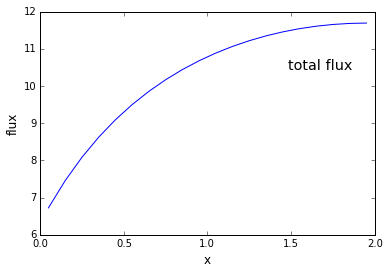

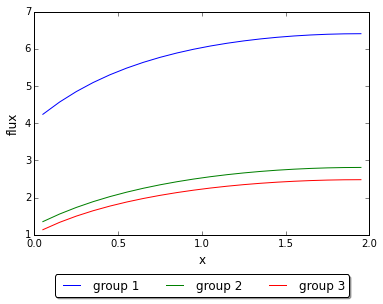

In [96]:
plt.figure()
plt.plot(pts, np.sum(flux.values(), axis=0))
plt.xlabel('x', size = 'large')
plt.ylabel('flux', size = 'large')
plt.figtext(0.7, 0.7, 'total flux', size = 'x-large')

plt.figure()
plt.plot(pts, flux[0], label='group 1')
plt.plot(pts, flux[1], label='group 2') 
plt.plot(pts, flux[2], label='group 3')
plt.xlabel('x', size = 'large')
plt.ylabel('flux', size = 'large')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
# FANCY BOX!

This looks like an appropriate flux shape; the scattering 